# Фаза 2 • Неделя 9 • Компьютерное зрение
## Детекция объектов с помощью YOLO

Устанавливаем зависимости

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt # install

d:\Bootcamp\phase_2\streamlit\mine\yolov5


fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [1]:
# !pip install roboflow

In [3]:
import torch
import PIL
import os
import matplotlib.pyplot as plt

### 2. Обучение на своих данных.

 1. Размечаем датасет на roboflow и скачиваем его к себе.
 2. Запускаем обучение!

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="MZCtG0ZeGsObaI2yEbId")
project = rf.workspace("minecraft-object-detection").project("minecraft-mob-detection")
dataset = project.version(10).download("yolov5")





loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Minecraft-Mob-Detection-10 in yolov5pytorch:: 100%|██████████| 5780/5780 [00:01<00:00, 3096.70it/s]


In [5]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 100 --data /content/yolov5/Minecraft-Mob-Detection-10/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Minecraft-Mob-Detection-10/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma

### Простейший инференс

In [6]:
from torchvision import transforms as T
model = torch.hub.load(
    '.', # пути будем указывать гдето в локальном пространстве
    'custom', # непредобученная
    path='/content/yolov5/runs/train/exp/weights/best.pt', # путь к нашим весам
    source='local' # откуда берем модель – наша локальная
    )

YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [30]:
model.conf = 0.2

In [8]:
import os
from PIL import Image

image_folder = '/content/yolov5/Minecraft-Mob-Detection-10/test/images'
image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.jpg')]

def inference_generator():
    # Получаем список файлов в папке
    image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.jpg')]

    # Итерируемся по всем изображениям
    for img_path in image_files:
        # Открываем изображение
        image = Image.open(img_path)

        # Выполняем инференс
        results = model(image)

        # Возвращаем результаты (или делайте другие операции с результатами, как вам нужно)
        yield results


In [9]:
gen = inference_generator()

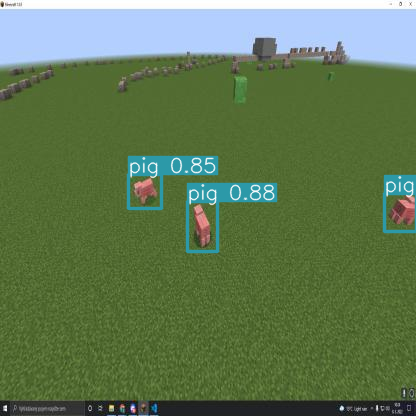

In [47]:
next(gen).show()

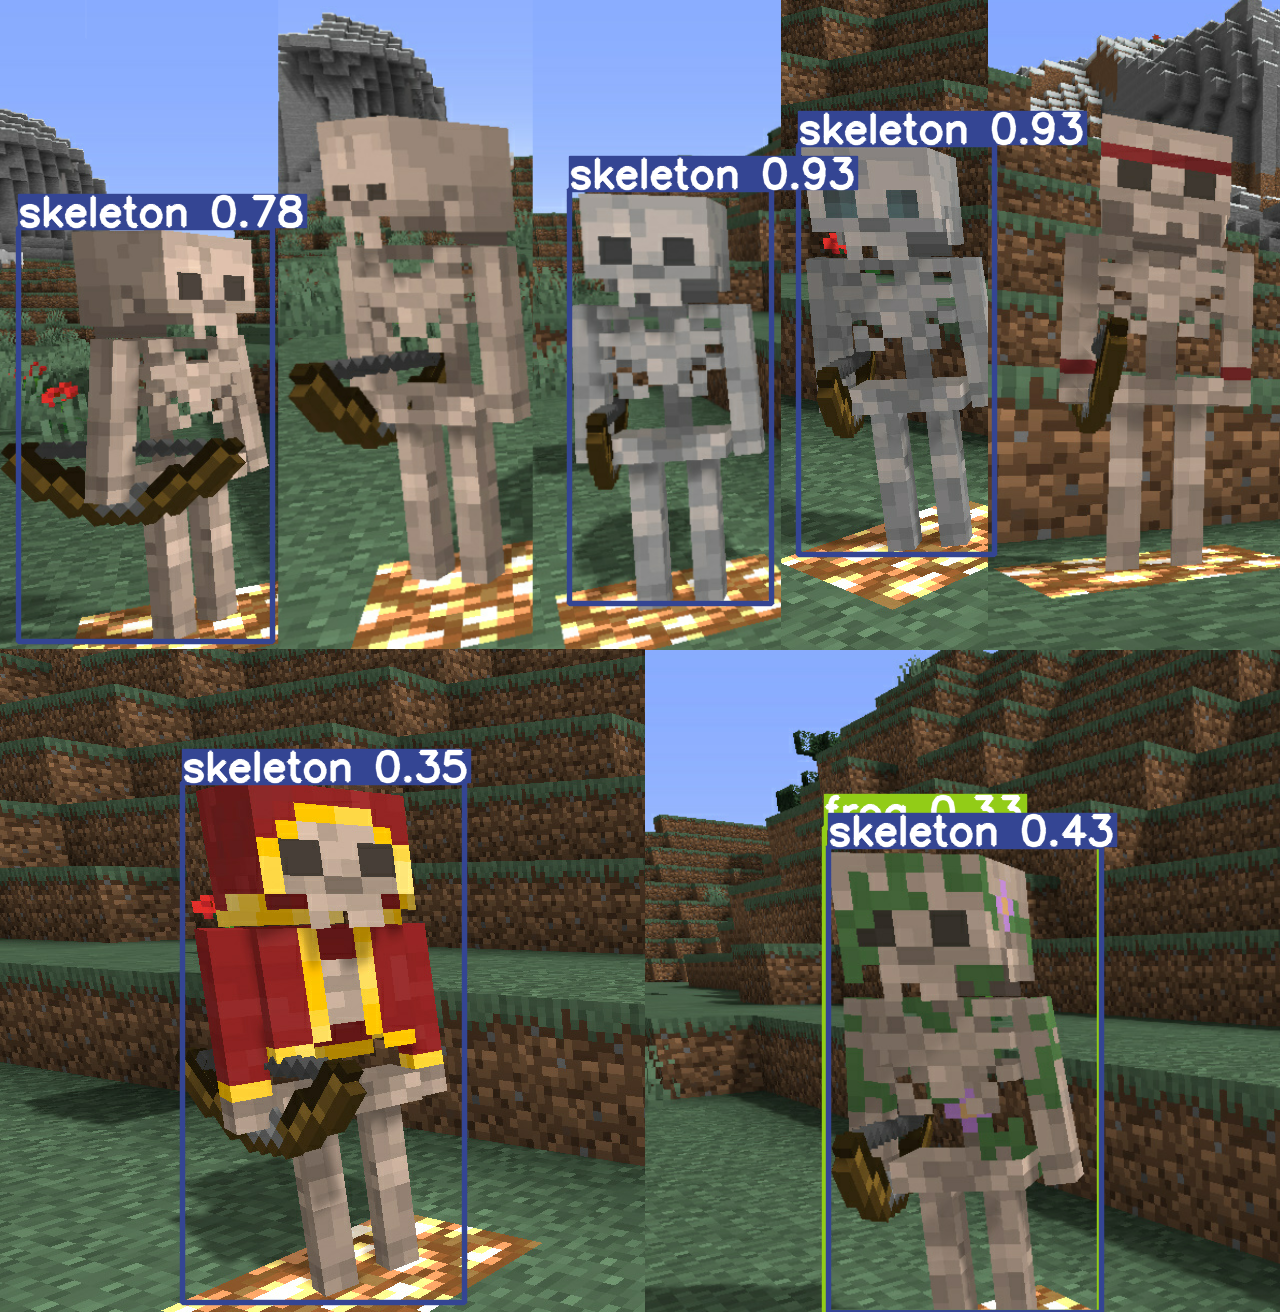

In [50]:
import requests
import io
image_url = 'https://i.redd.it/6x1cp2vcca041.png'
# Получаем изображение по URL
response = requests.get(image_url)
image_bytes = io.BytesIO(response.content)
image = Image.open(image_bytes)

# Передаем изображение в модель для инференса
results = model(image)

# Вывод результатов
results.show()